In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report)
import warnings
warnings.filterwarnings('ignore')

In [2]:
sbi=pd.read_csv('sbi.life.csv')
sbi

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
5,31,0,25.740,0,0,2,3756.62160,0
6,46,0,33.440,1,0,2,8240.58960,1
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0
9,60,0,25.840,0,0,1,28923.13692,0


# Data Exploration

In [5]:
sbi.shape

(1338, 8)

In [6]:
sbi.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [8]:
sbi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.7 KB


In [9]:
sbi.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [10]:
sbi['insuranceclaim'].unique()

array([1, 0], dtype=int64)

In [11]:
sbi.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


In [12]:
sbi.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


As we can see their is a outlier in the attribute'charges'.

# Data Visualization

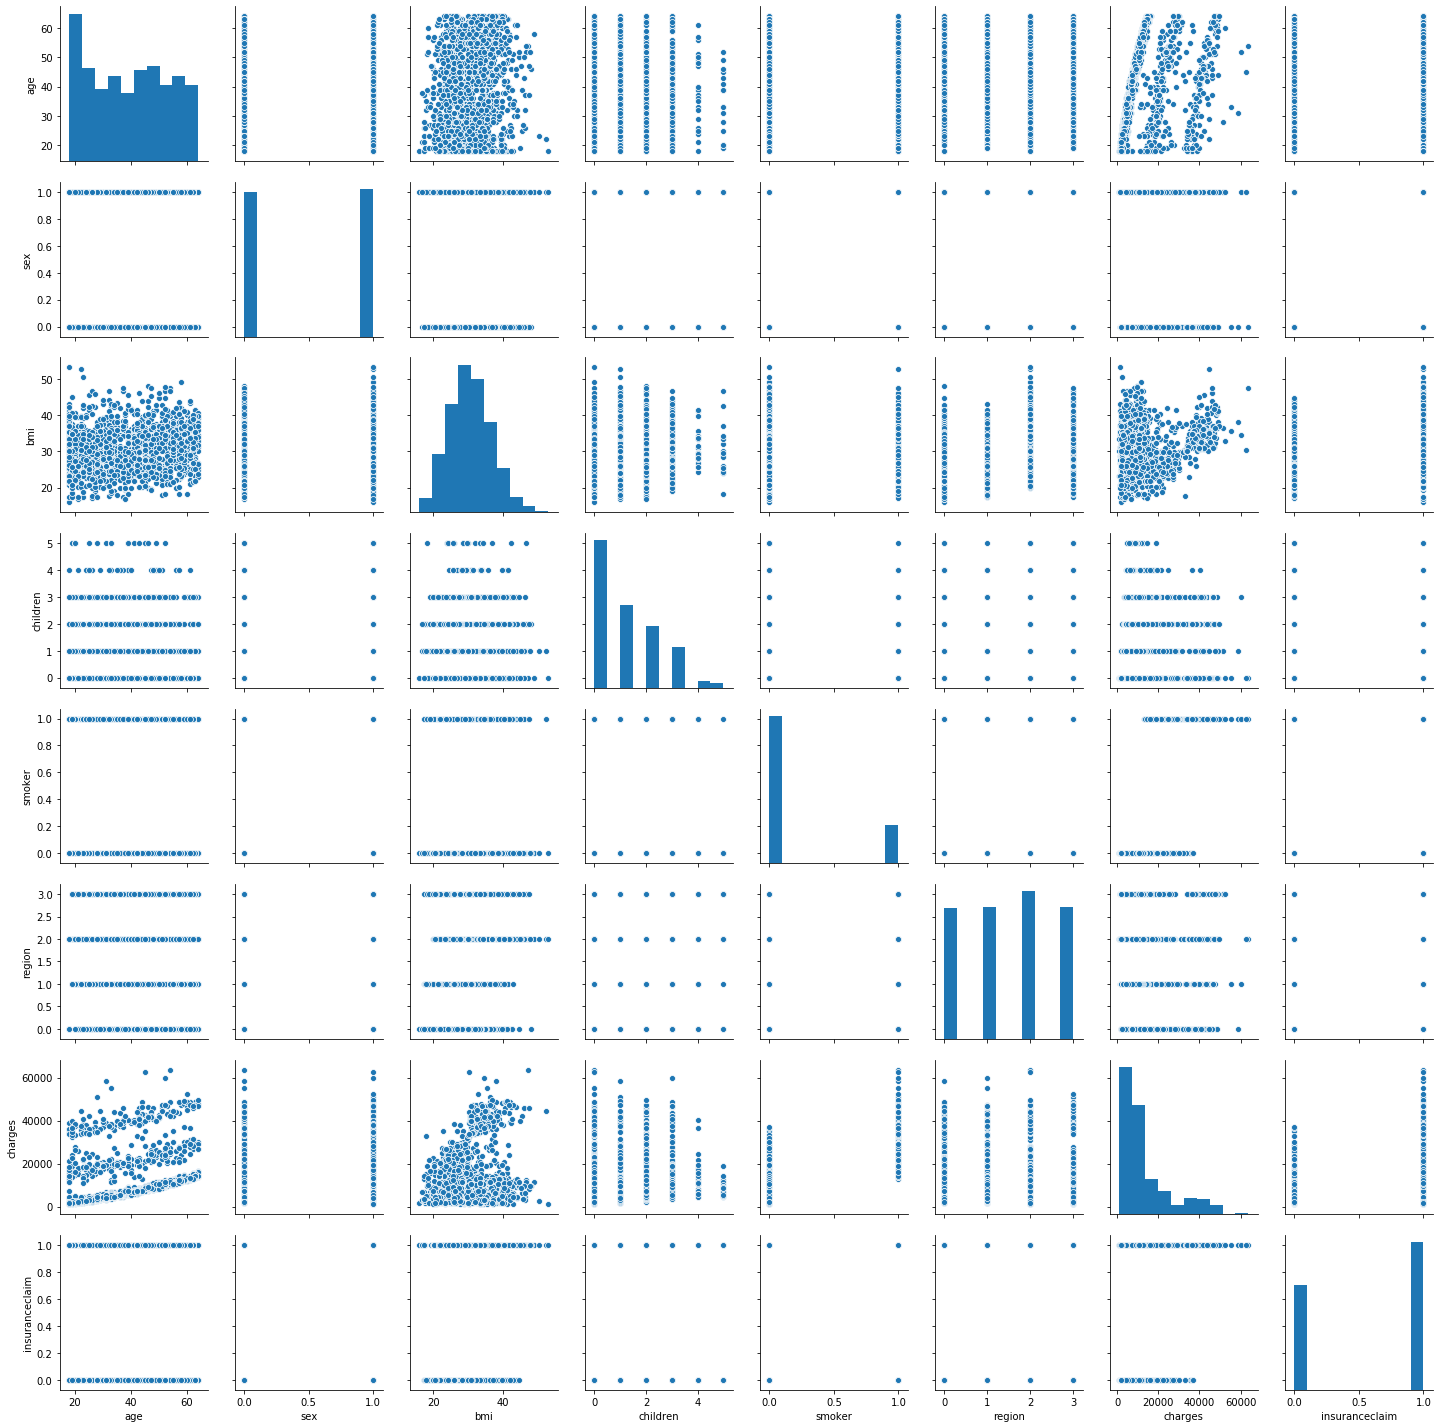

In [13]:
#bivariate analysis
sns.pairplot(sbi)

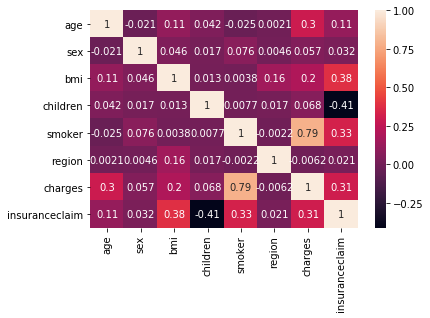

In [14]:
#Correlation Heatmap
sns.heatmap(sbi.corr(),annot=True)
plt.show()

In [15]:
#counting target variables
from collections import Counter
Counter(sbi['insuranceclaim'])

Counter({1: 783, 0: 555})

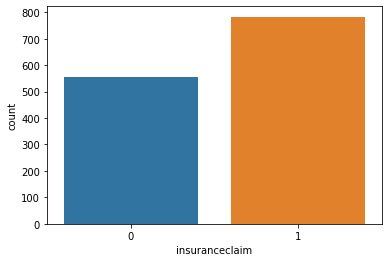

In [18]:
#plotting the count ofthe target data
sns.countplot(x='insuranceclaim',data=sbi)

In [19]:
sbi.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

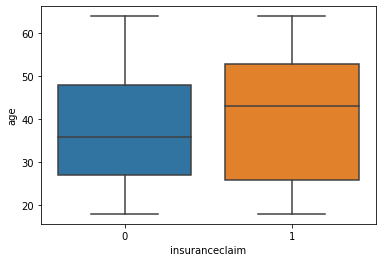

In [20]:
#checking outliers against target variable
sns.boxplot('insuranceclaim', 'age', data = sbi)

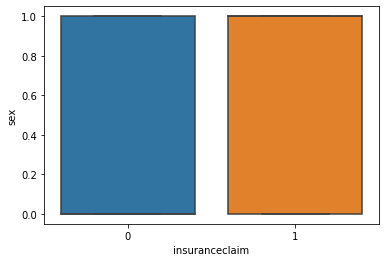

In [21]:
sns.boxplot('insuranceclaim', 'sex', data = sbi)

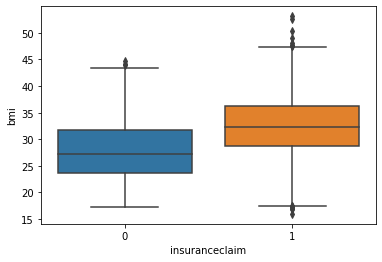

In [22]:
sns.boxplot('insuranceclaim', 'bmi', data = sbi)

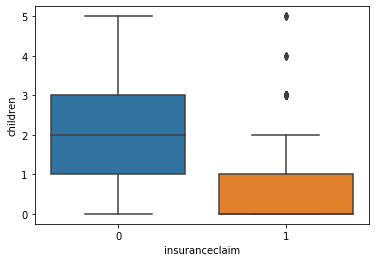

In [23]:
sns.boxplot('insuranceclaim', 'children', data = sbi)

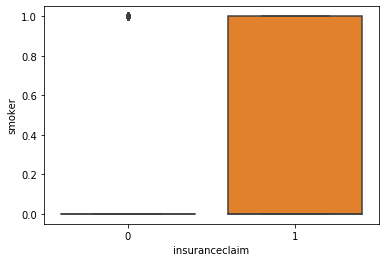

In [24]:
sns.boxplot('insuranceclaim', 'smoker', data = sbi)

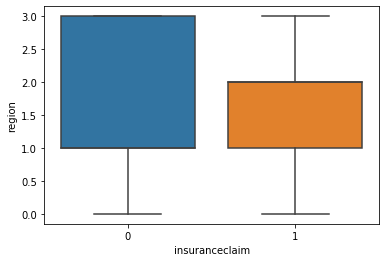

In [25]:
sns.boxplot('insuranceclaim', 'region', data = sbi)

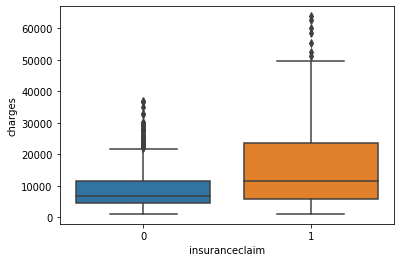

In [26]:
sns.boxplot('insuranceclaim', 'charges', data = sbi)

In [3]:
#outlier treatment
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(sbi))
z

array([[1.43876426, 1.0105187 , 0.45332   , ..., 1.34390459, 0.2985838 ,
        0.84190989],
       [1.50996545, 0.98959079, 0.5096211 , ..., 0.43849455, 0.95368917,
        0.84190989],
       [0.79795355, 0.98959079, 0.38330685, ..., 0.43849455, 0.72867467,
        1.18777557],
       ...,
       [1.50996545, 1.0105187 , 1.0148781 , ..., 0.43849455, 0.96159623,
        0.84190989],
       [1.29636188, 1.0105187 , 0.79781341, ..., 1.34390459, 0.93036151,
        1.18777557],
       [1.55168573, 1.0105187 , 0.26138796, ..., 0.46691549, 1.31105347,
        0.84190989]])

In [4]:
threshold=3
print(np.where(z>3))
df=sbi[(z<3).all(axis=1)]
df

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
       1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int32), array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 6, 6, 3, 3, 6, 2], dtype=int32))


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
5,31,0,25.740,0,0,2,3756.62160,0
6,46,0,33.440,1,0,2,8240.58960,1
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0
9,60,0,25.840,0,0,1,28923.13692,0


In [5]:
sbi.shape

(1338, 8)

In [6]:
df.shape

(1309, 8)

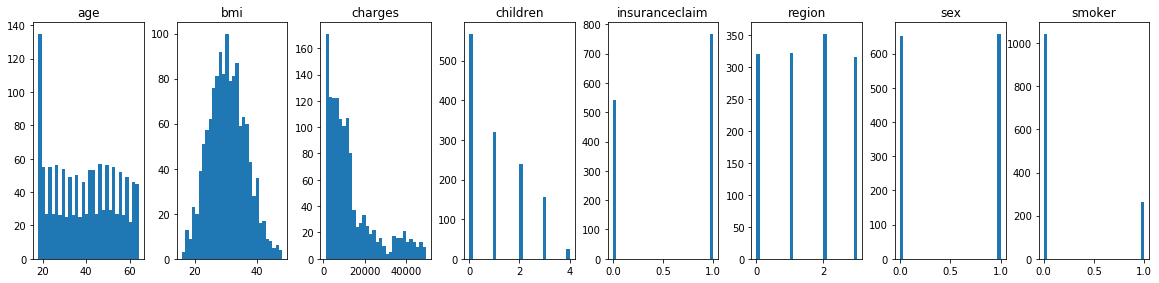

In [31]:
df.hist(figsize=(20,10),grid=False,layout=(2,8),bins=30)
plt.show()

As we can see in column'charges' data is skewed towards left

In [7]:
import scipy.stats as stats
stats.skew(df)

array([ 0.05128129, -0.01069534,  0.1912123 ,  0.73727262,  1.48103142,
       -0.02300016,  1.43551272, -0.35216534])

In [8]:
x=df.drop("insuranceclaim",axis=1)

In [9]:
y=df['insuranceclaim']

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [11]:
x.shape

(1309, 7)

In [12]:
y.shape

(1309,)

In [13]:
#splitting the data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.22, random_state = 42)

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1021, 7)
(288, 7)
(1021,)
(288,)


In [15]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

88.54166666666666
[[ 97  15]
 [ 18 158]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       112
           1       0.91      0.90      0.91       176

    accuracy                           0.89       288
   macro avg       0.88      0.88      0.88       288
weighted avg       0.89      0.89      0.89       288



In [16]:
# Cross Validation Classification Accuracy
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
print(("Accuracy: %.3f (%.3f)") % (results.mean(), results.std()))

Accuracy: 0.883 (0.021)


In [17]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb)*100)
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

73.26388888888889
[[107   5]
 [ 72 104]]
              precision    recall  f1-score   support

           0       0.60      0.96      0.74       112
           1       0.95      0.59      0.73       176

    accuracy                           0.73       288
   macro avg       0.78      0.77      0.73       288
weighted avg       0.82      0.73      0.73       288



In [18]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc)*100)
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

98.95833333333334
[[111   1]
 [  2 174]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       112
           1       0.99      0.99      0.99       176

    accuracy                           0.99       288
   macro avg       0.99      0.99      0.99       288
weighted avg       0.99      0.99      0.99       288



In [19]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn)*100)
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

87.5
[[ 96  16]
 [ 20 156]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       112
           1       0.91      0.89      0.90       176

    accuracy                           0.88       288
   macro avg       0.87      0.87      0.87       288
weighted avg       0.88      0.88      0.88       288



In [20]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[107   5]
 [ 16 160]]
92.70833333333334


In [21]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [22]:
svmkernel('rbf')

0.9027777777777778
[[107   5]
 [ 23 153]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88       112
           1       0.97      0.87      0.92       176

    accuracy                           0.90       288
   macro avg       0.90      0.91      0.90       288
weighted avg       0.91      0.90      0.90       288



In [23]:
svmkernel('poly')

0.9097222222222222
[[107   5]
 [ 21 155]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89       112
           1       0.97      0.88      0.92       176

    accuracy                           0.91       288
   macro avg       0.90      0.92      0.91       288
weighted avg       0.92      0.91      0.91       288



In [24]:
svmkernel('linear')

0.8923611111111112
[[100  12]
 [ 19 157]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       112
           1       0.93      0.89      0.91       176

    accuracy                           0.89       288
   macro avg       0.88      0.89      0.89       288
weighted avg       0.89      0.89      0.89       288



# Comparision Table

here we can see Decision Tree gives the highest accuracy of 98.61%, soit is the best fit model for ths evluation.

In [25]:
#roc-curve
from sklearn.metrics import roc_curve
y_pred_prob=dtc.predict_proba(x_test)[:,1]
y_pred_prob

array([1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [26]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [27]:
print(fpr)
print(tpr)
print(thresholds)

[0.         0.00892857 1.        ]
[0.         0.98863636 1.        ]
[2. 1. 0.]


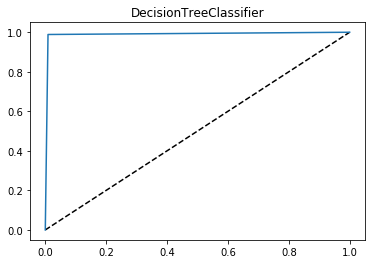

In [28]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="DecisionTreeClassifier")
plt.title("DecisionTreeClassifier")
plt.show()

In [29]:
from sklearn.metrics import roc_auc_score

In [30]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print(auc_score)

0.8818993506493507


In [31]:
from sklearn.externals import joblib

In [32]:
#saving the model as pickl
joblib.dump(lg,"Project 15_sbi life.pkl")

['Project 15_sbi life.pkl']